# Removing noise using Gaussian, median, and bilateral filters

All real images are noisy. Noise not only spoils the appearance of the image but also it makes harder for your algorithms to handle them as input. In this recipe, we consider how to get rid of noise or dramatically decrease it.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
Converted to float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32: float32


<Figure size 1080x1080 with 0 Axes>

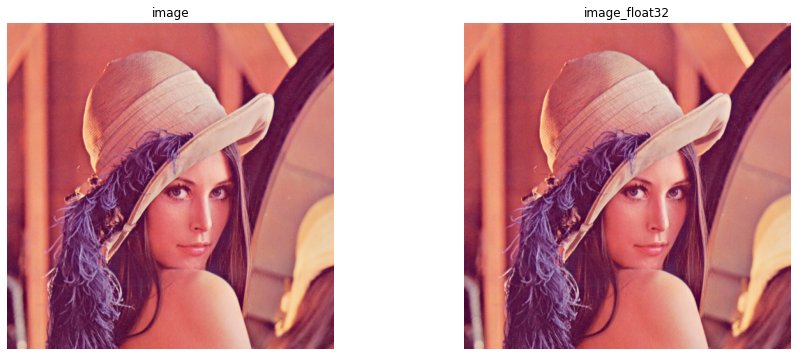

In [2]:
image = cv2.imread('data/Lena.png')



########################################################
print_image('Original', 'image',  image,0,1,0,7)

image_float32 = cv2.imread('data/Lena.png').astype(np.float32) / 255
#image_float32 = np.copy(image).astype(np.float32) / 255
print_image('Converted to float32', 'image_float32',  image_float32,0,1,0,7)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]]  
                   ])

cv2.imshow('image', image)
cv2.imshow('image_float32', image_float32)
cv2.waitKey()
cv2.destroyAllWindows()

Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
Converted to float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32: float32
NNNNNoised
  Shape: (512, 512, 3)   Data type: float32
[ [0.5651041 0.7273978 1.       ] [0.6099278  0.5684587  0.91747344] [0.53318536 0.71049017 0.9947328 ] [0.6435753  0.53745025 1.        ] [0.63707674 0.58364433 0.9226395 ] [0.49158287 0.56673086 0.9912258 ] [0.5687419  0.59942234 1.        ] ]  noised: float32


<Figure size 1080x1080 with 0 Axes>

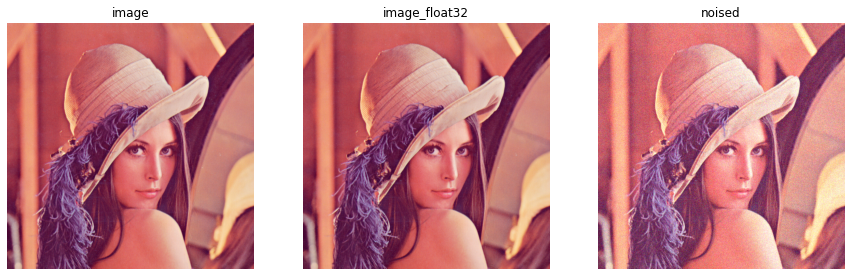

In [3]:
np.random.seed(42)
# Create noise in the image by adding random values to each pixel

noised = (image_float32 + 0.2 * np.random.rand(*image_float32.shape).astype(np.float32))
noised = noised.clip(0, 1)

#################################################
print_image('Original', 'image', image,0,1,0,7)
print_image('Converted to float32', 'image_float32', image_float32,0,1,0,7)
print_image('NNNNNoised', 'noised', noised,0,1,0,7)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],  
                    ["noised",noised[:,:,[2,1,0]]]  
                   ])

cv2.imshow('image_float32 -> NNNNNoised', np.hstack([image_float32, noised]))
cv2.waitKey()
cv2.destroyAllWindows()

Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
Converted to float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32: float32
NNNNNoised
  Shape: (512, 512, 3)   Data type: float32
[ [0.5651041 0.7273978 1.       ] [0.6099278  0.5684587  0.91747344] [0.53318536 0.71049017 0.9947328 ] [0.6435753  0.53745025 1.        ] [0.63707674 0.58364433 0.9226395 ] [0.49158287 0.56673086 0.9912258 ] [0.5687419  0.59942234 1.        ] [0.51417327 0.58391917 0.96346843] [0.5892532  0.7060548  0.93013084] [0.56951356 0.65181625 0.89164305] ]  noised: float32
image_GaussianBlur
  Shape: (512, 512, 3)   Data type: float32
[ [0.5891

<Figure size 1080x1080 with 0 Axes>

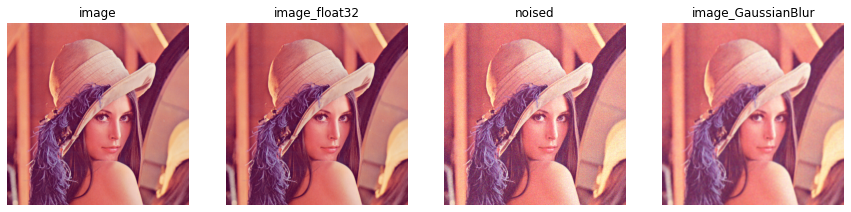

In [4]:
# Apply GaussianBlur to the noisy image and show the result

image_GaussianBlur = cv2.GaussianBlur(noised, (7, 7), 0)


#####################################################
print_image('Original', 'image', image,0,1,0,7)
print_image('Converted to float32', 'image_float32', image_float32,0,1,0,7)
print_image('NNNNNoised', 'noised', noised,0,1,0,10)
print_image('image_GaussianBlur', 'image_GaussianBlur', image_GaussianBlur,0,1,0,7)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],  
                    ["noised",noised[:,:,[2,1,0]]],
                    ["image_GaussianBlur",image_GaussianBlur[:,:,[2,1,0]]]
                   ])

cv2.imshow('image_float32 -> NNNNNoised -> image_GaussianBlur', 
           np.hstack([image_float32, noised,image_GaussianBlur]))
cv2.waitKey()
cv2.destroyAllWindows()

Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
Converted to float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32: float32
NNNNNoised
  Shape: (512, 512, 3)   Data type: float32
[ [0.5651041 0.7273978 1.       ] [0.6099278  0.5684587  0.91747344] [0.53318536 0.71049017 0.9947328 ] [0.6435753  0.53745025 1.        ] [0.63707674 0.58364433 0.9226395 ] [0.49158287 0.56673086 0.9912258 ] [0.5687419  0.59942234 1.        ] ]  noised: float32
image_GaussianBlur
  Shape: (512, 512, 3)   Data type: float32
[ [0.58911204 0.6559822  0.94960845] [0.5915875 0.6531977 0.9545962] [0.59355646 0.64641345 0.9670708 ] [0.5878058

<Figure size 1080x1080 with 0 Axes>

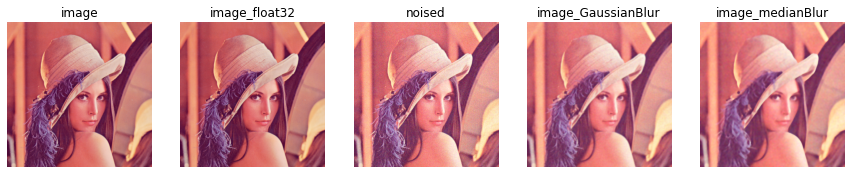

In [5]:
# Apply median filtering

image_medianBlur = cv2.medianBlur((noised * 255).astype(np.uint8), 7)


###########################################################
print_image('Original', 'image', image,0,1,0,7)
print_image('Converted to float32', 'image_float32', image_float32,0,1,0,7)
print_image('NNNNNoised', 'noised', noised,0,1,0,7)
print_image('image_GaussianBlur', 'image_GaussianBlur', image_GaussianBlur,0,1,0,7)
print_image('image_medianBlur', 'image_medianBlur', image_medianBlur,0,1,0,7)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],  
                    ["noised",noised[:,:,[2,1,0]]],
                    ["image_GaussianBlur",image_GaussianBlur[:,:,[2,1,0]]],
                    ["image_medianBlur",image_medianBlur[:,:,[2,1,0]]]
                   ])

cv2.imshow('image -> NNNNNoised -> image_medianBlur', np.hstack([image,image_medianBlur]))
cv2.imshow('image_float32 -> NNNNNoised -> image_GaussianBlur', np.hstack([noised,image_GaussianBlur]))
cv2.waitKey()
cv2.destroyAllWindows()

Original
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] ]  image: uint8
Converted to float32
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] [0.5019608  0.53333336 0.8745098 ] [0.47058824 0.5411765  0.8862745 ] [0.45490196 0.5058824  0.8862745 ] [0.48235294 0.5411765  0.89411765] ]  image_float32: float32
NNNNNoised
  Shape: (512, 512, 3)   Data type: float32
[ [0.5651041 0.7273978 1.       ] [0.6099278  0.5684587  0.91747344] [0.53318536 0.71049017 0.9947328 ] [0.6435753  0.53745025 1.        ] [0.63707674 0.58364433 0.9226395 ] [0.49158287 0.56673086 0.9912258 ] [0.5687419  0.59942234 1.        ] ]  noised: float32
image_GaussianBlur
  Shape: (512, 512, 3)   Data type: float32
[ [0.58911204 0.6559822  0.94960845] [0.5915875 0.6531977 0.9545962] [0.59355646 0.64641345 0.9670708 ] [0.5878058

<Figure size 1080x1080 with 0 Axes>

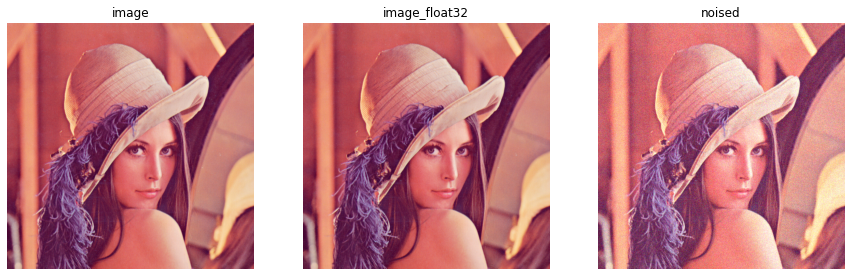

<Figure size 1080x1080 with 0 Axes>

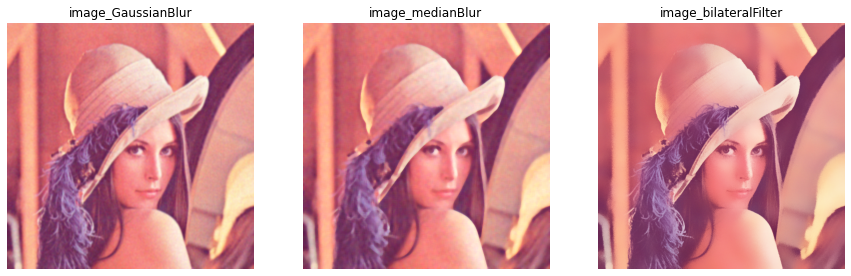

In [6]:
# Perform median filtration to our image with noise:

image_bilateralFilter = cv2.bilateralFilter(noised, -1, 0.3, 10)


################################################
print_image('Original', 'image', image,0,1,0,7)
print_image('Converted to float32', 'image_float32', image_float32,0,1,0,7)
print_image('NNNNNoised', 'noised', noised,0,1,0,7)
print_image('image_GaussianBlur', 'image_GaussianBlur', image_GaussianBlur,0,1,0,7)
print_image('image_medianBlur', 'image_medianBlur', image_medianBlur,0,1,0,7)
print_image('Bilat', 'image_bilateralFilter', image_bilateralFilter,0,1,0,7)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_float32",image_float32[:,:,[2,1,0]]],  
                    ["noised",noised[:,:,[2,1,0]]]
                   ])
plt.figure(figsize=(15,15))
plt_view_image(plt,[["image_GaussianBlur",image_GaussianBlur[:,:,[2,1,0]]],
                    ["image_medianBlur",image_medianBlur[:,:,[2,1,0]]],
                    ["image_bilateralFilter",image_bilateralFilter[:,:,[2,1,0]]]
                   ])


cv2.imshow('image -> NNNNNoised -> image_medianBlur', np.hstack([image,image_medianBlur]))
cv2.imshow('image_float32 -> NNNNNoised -> image_GaussianBlur/image_bilateralFilter', 
           np.hstack([noised,image_GaussianBlur,image_bilateralFilter]))
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
# cv2.GaussianBlur is used to apply a Gaussian filter to the image. 
# This function takes an input image, kernel size in ( width, height)
# format, and standard deviations along width and height. 
# The kernel size should be a positive, odd number.